In [14]:
from matplotlib import pyplot as plt
import numpy as np

In [27]:
results_dir = "../../results/time_overhead_full_speed"

min_logs = 1
max_logs = 1_000_000
num_simuls = 10
num_logs_ls = np.geomspace(min_logs, max_logs, int(np.log10(max_logs)) + 1).astype(int)

wout_lushu_agg = []
with_lushu_agg = []
for num_logs in num_logs_ls:
    wout_lushu = []
    with_lushu = []
    for simul_num in range(num_simuls):
        test_result = open(f"{results_dir}/{num_logs}-{simul_num}").read()
        bynewline = test_result.split("\n")
        def format_time(t):
            return int(t)
        wout_lushu.append(format_time(bynewline[0]))
        with_lushu.append(format_time(bynewline[1]))
    wout_lushu_agg.append(np.mean(wout_lushu))
    with_lushu_agg.append(np.mean(with_lushu))

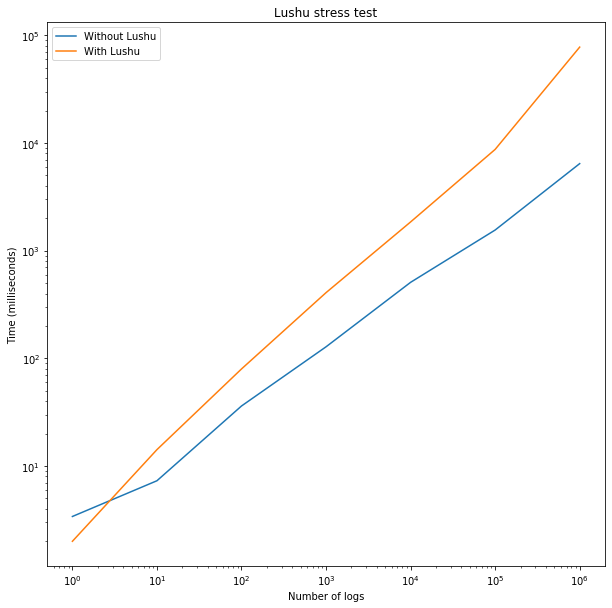

In [48]:
x = num_logs_ls

figside = 10
plt.figure(figsize=(figside, figside))

plt.title("Lushu stress test")

plt.xscale("log")
plt.xlabel("Number of logs")
plt.yscale("log")
plt.ylabel("Time (milliseconds)")

plt.plot(x, wout_lushu_agg, label="Without Lushu")
plt.plot(x, with_lushu_agg, label="With Lushu")

plt.legend()
plt.show()